In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_df = pd.read_csv('train_df2.csv', index_col=0)
train_df.drop(['positive', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
train_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
              axis=1, inplace=True)
train_df.head()

,customer_id,product_parent,star_rating,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3
0,1617361,849246716,5,5,5.000000,0.000000,297,4.872054,0.363625,0.033451,...,0.186957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,53052607,849246716,3,5,3.600000,0.547723,297,4.872054,0.363625,0.012478,...,-0.028547,0.172017,0.084518,0.194290,0.002472,0.006273,0.052950,0.344210,0.307019,0.363920
2,15679577,849246716,5,8,3.375000,1.505941,297,4.872054,0.363625,0.007220,...,0.044000,0.371702,0.000015,0.316641,0.156807,0.052990,0.165214,0.011699,-0.066285,-0.171195
3,16367779,849246716,5,9,4.444444,0.527046,297,4.872054,0.363625,0.095238,...,-0.171195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,25485198,849246716,5,17,5.000000,0.000000,297,4.872054,0.363625,0.010870,...,0.249734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
train_df.columns

Index(['customer_id', 'product_parent', 'star_rating', 'cust_review_count',
       'cust_star_rating_mean', 'cust_star_rating_std', 'prod_review_count',
       'prod_star_rating_mean', 'prod_star_rating_std', 'pos_sim', 'neg_sim',
       'pos_1_word_1', 'pos_1_word_2', 'pos_1_word_3', 'pos_2_word_1',
       'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1', 'pos_3_word_2',
       'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
       'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 'neg_3_word_1',
       'neg_3_word_2', 'neg_3_word_3'],
      dtype='object')

In [4]:
train_df.groupby('star_rating').size()

star_rating
1     3431
2     2299
3     3801
4     7972
5    30219
dtype: int64

In [5]:
temp = train_df[train_df.star_rating == 1][:3324]
temp = pd.concat([temp, train_df[train_df.star_rating == 2]])
temp = pd.concat([temp, train_df[train_df.star_rating == 3]])
temp = pd.concat([temp, train_df[train_df.star_rating == 4][:len(train_df[train_df.star_rating == 4]) // 2]])
temp = pd.concat([temp, train_df[train_df.star_rating == 5][:len(train_df[train_df.star_rating == 5]) // 8]])
train_df = temp

In [5]:
train_df.groupby('star_rating').size() / len(train_df)

star_rating
1    0.071896
2    0.048175
3    0.079649
4    0.167051
5    0.633230
dtype: float64

In [6]:
test_df = pd.read_csv('test_df2.csv', index_col=0)
test_df.drop(['positive', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
test_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
              axis=1, inplace=True)
test_df.head()

,customer_id,product_parent,star_rating,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3
0,36330222,986428010,5,24,4.291667,1.267629,18,4.333333,1.188177,0.070423,...,0.001941,0.000987,-0.015594,-0.013630,0.006534,0.007653,0.023873,-0.029103,-0.046843,-0.041810
1,24360083,986428010,4,23,4.347826,1.191206,18,4.333333,1.188177,0.095361,...,0.901494,-0.222196,-0.196039,-0.217517,0.918800,0.925143,0.901494,0.919331,0.902017,1.000000
2,28891040,437083384,4,10,4.500000,0.707107,407,4.503686,0.887439,0.006944,...,0.092532,0.313854,0.086877,0.315884,0.196752,0.052950,0.194290,0.054040,0.014332,-0.002904
3,52449052,437083384,3,5,3.400000,1.516575,407,4.503686,0.887439,0.010390,...,0.187860,0.083284,-0.115922,0.023810,0.090283,-0.083403,0.025464,0.084633,-0.092710,0.019767
4,27192976,437083384,4,6,4.666667,0.816497,407,4.503686,0.887439,0.012942,...,0.126235,-0.083963,0.036128,-0.155615,-0.020984,0.021015,-0.042505,0.059809,-0.017769,-0.064662


In [7]:
len(test_df.query('star_rating == 5')) / len(test_df)

0.5701294600568361

In [8]:
train_ids = train_df[['customer_id', 'product_parent', 'star_rating', 'pos_sim', 'neg_sim',
        'pos_2_word_1', 'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1',
        'pos_3_word_2', 'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2',
        'neg_1_word_3', 'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3',
        'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']]

In [9]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train_df_norm = pd.DataFrame(min_max_scaler.fit_transform(train_df), columns=train_df.columns, index=train_df.index)
train_df_norm[['customer_id', 'product_parent', 'star_rating', 'pos_sim', 'neg_sim',
        'pos_2_word_1', 'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1',
        'pos_3_word_2', 'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2',
        'neg_1_word_3', 'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3',
        'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']] = train_ids
train_df_norm.head()

,customer_id,product_parent,star_rating,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3
0,1617361,849246716,5,0.013393,1.000000,0.000000,0.047284,0.968013,0.128561,0.033451,...,0.186957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,53052607,849246716,3,0.013393,0.650000,0.237171,0.047284,0.968013,0.128561,0.012478,...,-0.028547,0.172017,0.084518,0.194290,0.002472,0.006273,0.052950,0.344210,0.307019,0.363920
2,15679577,849246716,5,0.026786,0.593750,0.652091,0.047284,0.968013,0.128561,0.007220,...,0.044000,0.371702,0.000015,0.316641,0.156807,0.052990,0.165214,0.011699,-0.066285,-0.171195
3,16367779,849246716,5,0.031250,0.861111,0.228218,0.047284,0.968013,0.128561,0.095238,...,-0.171195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,25485198,849246716,5,0.066964,1.000000,0.000000,0.047284,0.968013,0.128561,0.010870,...,0.249734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
test_ids = test_df[['customer_id', 'product_parent', 'star_rating', 'pos_sim', 'neg_sim',
        'pos_2_word_1', 'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1',
        'pos_3_word_2', 'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2',
        'neg_1_word_3', 'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3',
        'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']]

In [11]:
test_df_norm = pd.DataFrame(min_max_scaler.transform(test_df), columns=test_df.columns, index=test_df.index)
test_df_norm[['customer_id', 'product_parent', 'star_rating', 'pos_sim', 'neg_sim',
        'pos_2_word_1', 'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1',
        'pos_3_word_2', 'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2',
        'neg_1_word_3', 'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3',
        'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']] = test_ids
test_df_norm.head()

,customer_id,product_parent,star_rating,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3
0,36330222,986428010,5,0.098214,0.822917,0.548900,0.002716,0.833333,0.420084,0.070423,...,0.001941,0.000987,-0.015594,-0.013630,0.006534,0.007653,0.023873,-0.029103,-0.046843,-0.041810
1,24360083,986428010,4,0.093750,0.836957,0.515807,0.002716,0.833333,0.420084,0.095361,...,0.901494,-0.222196,-0.196039,-0.217517,0.918800,0.925143,0.901494,0.919331,0.902017,1.000000
2,28891040,437083384,4,0.035714,0.875000,0.306186,0.064856,0.875921,0.313757,0.006944,...,0.092532,0.313854,0.086877,0.315884,0.196752,0.052950,0.194290,0.054040,0.014332,-0.002904
3,52449052,437083384,3,0.013393,0.600000,0.656696,0.064856,0.875921,0.313757,0.010390,...,0.187860,0.083284,-0.115922,0.023810,0.090283,-0.083403,0.025464,0.084633,-0.092710,0.019767
4,27192976,437083384,4,0.017857,0.916667,0.353553,0.064856,0.875921,0.313757,0.012942,...,0.126235,-0.083963,0.036128,-0.155615,-0.020984,0.021015,-0.042505,0.059809,-0.017769,-0.064662


In [12]:
test_df, train_df =  train_df, test_df
test_df_norm, train_df_norm =  train_df_norm, test_df_norm

In [13]:
train_x, train_y = train_df.drop('star_rating', axis=1), train_df['star_rating']
test_x, test_y = test_df.drop('star_rating', axis=1), test_df['star_rating']
train_x_norm = train_df_norm.drop('star_rating', axis=1)
test_x_norm = test_df.drop('star_rating', axis=1)

In [14]:
is_NaN = train_df_norm.isnull()
row_has_NaN = is_NaN.any(axis=1)
train_df_norm[row_has_NaN]

,customer_id,product_parent,star_rating,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_x_norm.drop(['customer_id', 'product_parent'], axis=1), train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [16]:
gb.score(test_x_norm.drop(['customer_id', 'product_parent'], axis=1), test_y)

0.6038933825070198

In [89]:
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', oob_score=True,
                            n_jobs=-1, class_weight="balanced_subsample", max_samples=0.10)
rf.fit(train_x.drop(['customer_id', 'product_parent'], axis=1), train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=0.1, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

In [90]:
rf.score(test_x.drop(['customer_id', 'product_parent'], axis=1), test_y)

0.636100750178115

In [20]:
rf2 = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rf2.fit(train_x.drop(['customer_id', 'product_parent'], axis=1), train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
rf2.score(test_x.drop(['customer_id', 'product_parent'], axis=1), test_y)

0.14217134457034308

<BarContainer object of 26 artists>

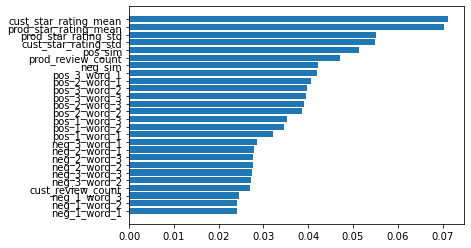

In [24]:
imp_tuples = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), 
                 train_x.drop(['customer_id', 'product_parent'], axis=1).columns), reverse=False)
imp = [t[0] for t in imp_tuples]
labl = [t[1] for t in imp_tuples]
plt.barh(labl, imp, linewidth=5)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(train_x_norm.drop(['customer_id', 'product_parent'], axis=1), train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [29]:
knn.score(test_x_norm.drop(['customer_id', 'product_parent'], axis=1), test_y)

0.5813880390595533

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_norm.drop(['customer_id', 'product_parent'], axis=1), train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
gnb.score(test_x_norm.drop(['customer_id', 'product_parent'], axis=1), test_y)

0.0929340765265496

In [87]:
correct = 0
pos_count = 0
star_cor = 0
matrix = [0, 0, 0, 0]
preds = rf.predict(test_x.drop(['customer_id', 'product_parent'], axis=1))
for i, row in test_df.iterrows():
    if (preds[i] > 3):
        pos_count += 1
    if (preds[i] == row.star_rating):
        star_cor += 1
    if (preds[i] > 3 and row.star_rating > 3):
        correct += 1
        matrix[0] += 1
    elif (preds[i] <= 3 and row.star_rating <= 3):
        correct += 1
        matrix[1] += 1
    elif (preds[i] > 3 and row.star_rating <= 3):
        matrix[2] += 1
    elif (preds[i] <= 3 and row.star_rating > 3):
        matrix[3] += 1

print('Correct:', correct, correct / len(test_df))
print('Pos:', pos_count, pos_count / len(test_df))
print('Star Correct:', star_cor, star_cor / len(test_df))
print('True Positive:', matrix[0], matrix[0] / len(test_df))
print('True Negative:', matrix[1], matrix[1] / len(test_df))
print('False Positive:', matrix[2], matrix[2] / len(test_df))
print('False Negative:', matrix[3], matrix[3] / len(test_df))

Correct: 38383 0.8043040945475881
Pos: 47354 0.9922886718913708
Star Correct: 30355 0.6360797954821675
True Positive: 38103 0.7984367796823268
True Negative: 280 0.005867314865261305
False Positive: 9251 0.19385189220904406
False Negative: 88 0.0018440132433678387


In [35]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
import keras
import numpy as np
import matplotlib.pyplot as plt

In [36]:
keras.backend.clear_session()

In [37]:
nn_train_x = train_x_norm.drop(['customer_id', 'product_parent'], axis=1)
nn_test_x = test_x_norm.drop(['customer_id', 'product_parent'], axis=1)

In [38]:
np.shape(nn_train_x)

(15835, 26)

In [42]:
train_y_cat = train_y - 1
test_y_cat = test_y - 1
train_y_cat = to_categorical(train_y_cat)
test_y_cat = to_categorical(test_y_cat)

In [43]:
train_y_cat

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [79]:
network = models.Sequential()
network.add(layers.Dense(1024, activation='relu', input_shape=(26,)))
#network.add(layers.Dropout(0.5))
network.add(layers.Dense(1024, activation='relu', input_shape=(1024,)))
network.add(layers.Dense(1024, activation='relu', input_shape=(1024,)))
network.add(layers.Dense(512, activation='relu', input_shape=(1024,)))
#network.add(layers.Dropout(0.5))
network.add(layers.Dense(512, activation='relu', input_shape=(512,)))
network.add(layers.Dense(512, activation='relu', input_shape=(512,)))
network.add(layers.Dense(256, activation='relu', input_shape=(512,)))
#network.add(layers.Dropout(0.5))
network.add(layers.Dense(256, activation='relu', input_shape=(256,)))
network.add(layers.Dense(256, activation='relu', input_shape=(256,)))
network.add(layers.Dense(128, activation='relu', input_shape=(256,)))
#network.add(layers.Dropout(0.5))
network.add(layers.Dense(128, activation='relu', input_shape=(128,)))
network.add(layers.Dense(128, activation='relu', input_shape=(128,)))
network.add(layers.Dense(5, activation='softmax', input_shape=(128,)))
network.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1024)              27648     
_________________________________________________________________
dense_38 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_39 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_40 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_41 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_42 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_43 (Dense)             (None, 256)              

In [80]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 30
history = network.fit(nn_train_x, 
                      train_y_cat, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(nn_test_x, test_y_cat))

Train on 15835 samples, validate on 47722 samples
Epoch 1/30
15835/15835 [==============================] - 3s 161us/step - loss: 1.5224 - accuracy: 0.5666 - val_loss: 13.1501 - val_accuracy: 0.6332
Epoch 2/30
15835/15835 [==============================] - 1s 89us/step - loss: 1.1893 - accuracy: 0.5701 - val_loss: 7.2805 - val_accuracy: 0.6330
Epoch 3/30
15835/15835 [==============================] - 2s 100us/step - loss: 1.1645 - accuracy: 0.5737 - val_loss: 6.5074 - val_accuracy: 0.6332
Epoch 4/30
15835/15835 [==============================] - 1s 90us/step - loss: 1.1515 - accuracy: 0.5737 - val_loss: 35.4066 - val_accuracy: 0.6332
Epoch 5/30
15835/15835 [==============================] - 1s 91us/step - loss: 1.1455 - accuracy: 0.5761 - val_loss: 125.3094 - val_accuracy: 0.6332
Epoch 6/30
15835/15835 [==============================] - 1s 87us/step - loss: 1.1419 - accuracy: 0.5775 - val_loss: 62.6485 - val_accuracy: 0.6332
Epoch 7/30
15835/15835 [==============================] - 2s 

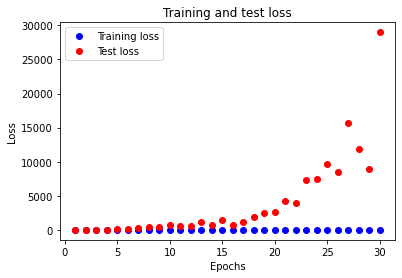

In [81]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

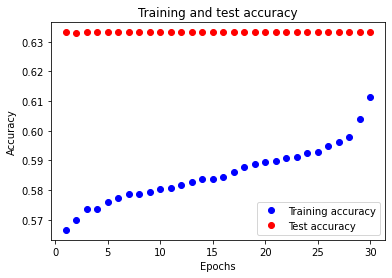

In [82]:
acc_values = history_dict['accuracy']
test_acc_values = history_dict['val_accuracy']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
correct = 0
pos_count = 0
star_cor = 0
matrix = [0, 0, 0, 0]
preds = network.predict(nn_test_x)
for i, row in test_df.iterrows():
    if (np.argmax(preds[i]) > 3):
        pos_count += 1
    if (np.argmax(preds[i]) == np.argmax(test_y_cat[i])):
        star_cor += 1
    if (np.argmax(preds[i]) > 3 and np.argmax(test_y_cat[i]) > 3):
        correct += 1
        matrix[0] += 1
    elif (np.argmax(preds[i]) <= 3 and np.argmax(test_y_cat[i]) <= 3):
        correct += 1
        matrix[1] += 1
    elif (np.argmax(preds[i]) > 3 and np.argmax(test_y_cat[i]) <= 3):
        matrix[2] += 1
    elif (np.argmax(preds[i]) <= 3 and np.argmax(test_y_cat[i]) > 3):
        matrix[3] += 1

print('Correct:', correct, correct / len(test_df))
print('Pos:', pos_count, pos_count / len(test_df))
print('Star Correct:', star_cor, star_cor / len(test_df))
print('True Positive:', matrix[0], matrix[0] / len(test_df))
print('True Negative:', matrix[1], matrix[1] / len(test_df))
print('False Positive:', matrix[2], matrix[2] / len(test_df))
print('False Negative:', matrix[3], matrix[3] / len(test_df))

Correct: 30219 0.6332299568333264
Pos: 47722 1.0
Star Correct: 30219 0.6332299568333264
True Positive: 30219 0.6332299568333264
True Negative: 0 0.0
False Positive: 17503 0.36677004316667366
False Negative: 0 0.0


In [75]:
#network.save('basic_neural_net3.h5')

In [78]:
sum(preds) / len(preds)

array([201.77647], dtype=float32)